# Data Mining Lab 1
In this lab session we will focus on the use of scientific computing libraries to efficiently process, transform, and manage data. We will also provide best practices and introduce visualization tools for effectively conducting big data analysis. Furthermore, we will show you how to implement basic classification techniques.

---

## Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Atrribute Transformation / Aggregation
 - 5.5 Dimensionality Reduction
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Data Classification
8. Conclusion
9. References

---

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 1. The Data


In [3]:
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
df = ds['train'].to_pandas()  # Convert the dataset to a pandas DataFrame

# Display the first few rows
print(df.head())

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...


In [4]:
print(df[:])

          sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]


---

## 2. Data Preparation

In [5]:
# categories
categories = ['nostalgia', 'not nostalgia']

In [6]:
# add category to the daaframe
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
df['category'] = LabelEncoder().fit_transform(df['sentiment'])
subdf_nostalgia = df[df['sentiment']=='nostalgia']
subdf_not_nostalgia = df[df['sentiment']!='nostalgia']
print(subdf_not_nostalgia)

          sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
8     not nostalgia           Wherever you  are you always in my heart   
9     not nostalgia  Elvis will always be number one no one can com...   
10    not nostalgia  ill bet if they begin to play this song on the...   
...             ...                                                ...   
1493  not nostalgia  He really has that "love you like a brother" l...   
1494  not nostalgia  That's funny. But Leo really is a nice guy. He...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   

      category  
0            1  
3            1  
8            1  
9            1  
10           1  
...      

## 3. Dealing with data 

In [7]:
# filter
filtered_df = df.loc[df['comment'].str.contains('mother')]
print("df.loc[df['comment'].str.contains('mother')]:\n", filtered_df['comment'][:5])


df.loc[df['comment'].str.contains('mother')]:
 51     Someone says it' about a tom girl. That is a p...
56     my mother and father in law loved this song. H...
69     Hearing him makes me want to cry.  He was my G...
201    Damn!!! I remember this moment when I was 20 o...
204    I was around 6 years old in 73 I had to talk m...
Name: comment, dtype: object


In [8]:
# check missing values
df.isnull()
## no missing value

sentiment  comment  category
0         False    False     False
1         False    False     False
2         False    False     False
3         False    False     False
4         False    False     False
...         ...      ...       ...
1495      False    False     False
1496      False    False     False
1497      False    False     False
1498      False    False     False
1499      False    False     False

[1500 rows x 3 columns]

In [9]:
# check Duplicate Data
df.duplicated()
sum(df.duplicated('comment'))

1

In [10]:
# delete Duplicate Data
df=df.drop_duplicates()
sum(df.duplicated('comment'))

0

***

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to perform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling

In [11]:
df_sample = df.sample(n=1000) #random state

In [12]:
len(df_sample)

1000

In [13]:
df_sample[0:4]

sentiment                                            comment  \
1154  not nostalgia  She is so pretty and very good singer!! Is she...   
861   not nostalgia  The song is great. Glitter - not so great. Peo...   
454       nostalgia  Great catchy tune takes me right back to the 7...   
202   not nostalgia  I think he's his most comfortable with this lo...   

      category  
1154         1  
861          1  
454          0  
202          1

---

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
categories

['nostalgia', 'not nostalgia']

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

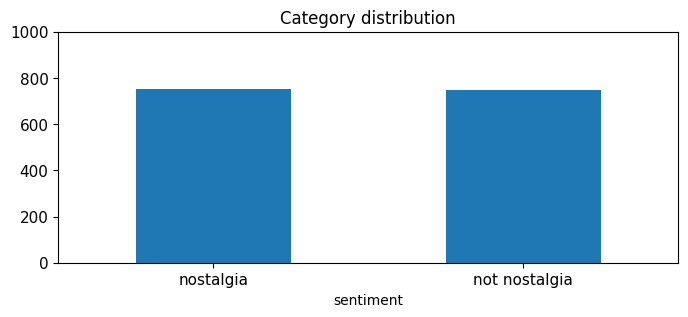

In [16]:
print(df.sentiment.value_counts())

# plot barchart for X
df.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sentiment
not nostalgia    504
nostalgia        496
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

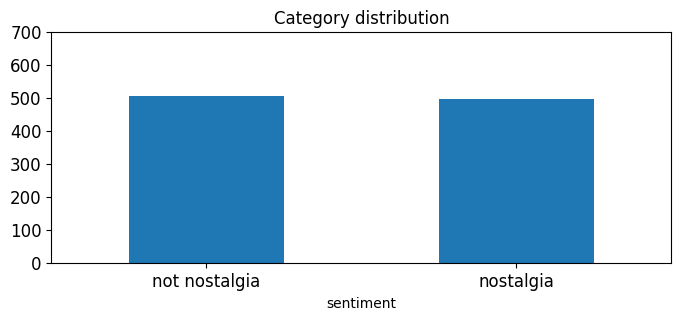

In [17]:
print(df_sample.sentiment.value_counts())

# plot barchart for X_sample
df_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 700], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

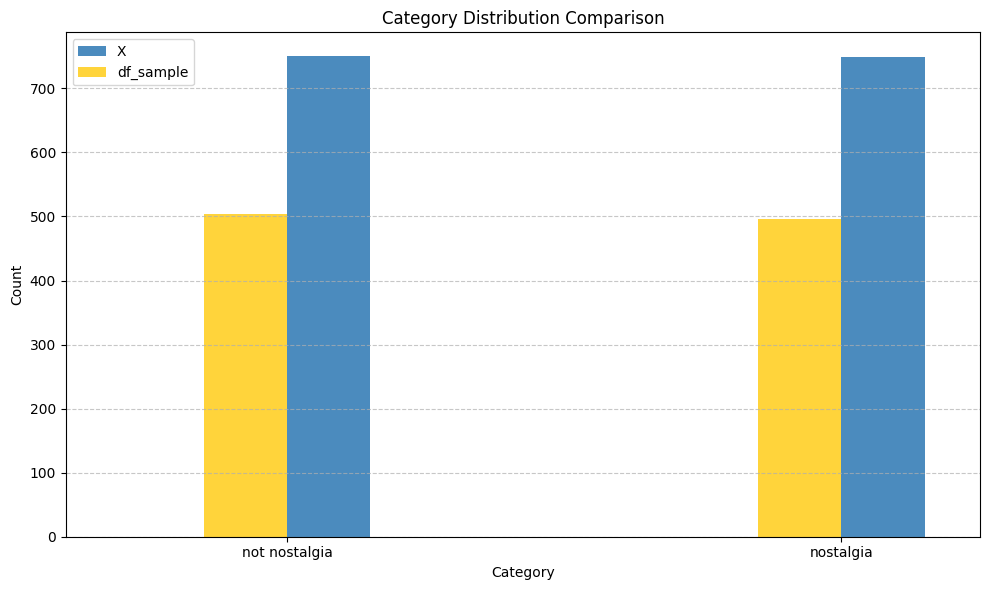

In [18]:
import matplotlib.pyplot as plt

# 計算 X 和 X_sample 的 category 分佈
x_counts = df.sentiment.value_counts()
x_sample_counts = df_sample.sentiment.value_counts()

# 創建一個新的圖形窗口
plt.figure(figsize=(10, 6))

color_x = '#4B8BBE'        # 藍色
color_x_sample = '#FFD43B'  # 黃色

# 繪製 X 的 category_name 分佈圖
x_counts.plot(kind='bar', rot = 0, color=color_x, width=0.15, position=0, label='X')

# 繪製 X_sample 的 category_name 分佈圖
x_sample_counts.plot(kind='bar', rot = 0, color=color_x_sample, width=0.15, position=1, label='df_sample')

# 添加標題和標籤
plt.title('Category Distribution Comparison')
plt.xlabel('Category')
plt.ylabel('Count')

# 顯示圖例
plt.legend()

# 增加網格線和調整美觀
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 顯示圖表
plt.tight_layout()
plt.show()

---

### 5.2 Feature Creation

In [19]:
import nltk
# my functions
import helpers.data_mining_helpers as dmh

In [20]:
# takes a like a minute or two to process
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

In [21]:
df[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [22]:
df[0:4]

sentiment                                            comment  category  \
0  not nostalgia  He was a singer with a golden voice that I lov...         1   
1      nostalgia  The mist beautiful voice ever I listened to hi...         0   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         0   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         1   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [23]:
list(df[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

---

### 5.3 Feature subset selection

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


Now you can also see some examples of what each feature is based on their index in the vector:

In [25]:
count_vect.get_feature_names_out()[1598]

'he'

In [26]:
count_vect.get_feature_names_out()[3570]

'was'

In [27]:
count_vect.get_feature_names_out()[2973]

'singer'

In [28]:
count_vect.get_feature_names_out()[3650]

'with'

In [29]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")
# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [30]:
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(" ".join(list(df[:1].comment)))

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

Now let us look at the term-document matrix we built above.

In [31]:
# We can check the shape of this matrix by:
X_counts.shape

(1499, 3730)

In [32]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [33]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [34]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

As you can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the fifth record, specifically, contains a `1` in the beginning, which from our feature names we can deduce that this article contains exactly one `00` term.

---

In [35]:
# Answer here
# 獲取第4條記錄的詞項計數
fifth_record_counts = X_counts[3].toarray().flatten()

# 獲取詞彙表
vocabulary = count_vect.vocabulary_

# 找到所有值為 1 的索引
indices_of_ones = [index for index, count in enumerate(fifth_record_counts) if count == 1 and index < 100]
print("The indices where count == 1 in X_counts[3:4, 0:100]: ",indices_of_ones)

# 根據索引查找對應的詞彙
words_represented = [word for index in indices_of_ones if index in vocabulary.values() for word, idx in vocabulary.items() if idx == index]

# 輸出結果
print("Words represented by '1's in the fifth record:", words_represented)

The indices where count == 1 in X_counts[3:4, 0:100]:  [62, 90, 91]
Words represented by '1's in the fifth record: ['1st', '2nd', '30']


---

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [36]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [37]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [38]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

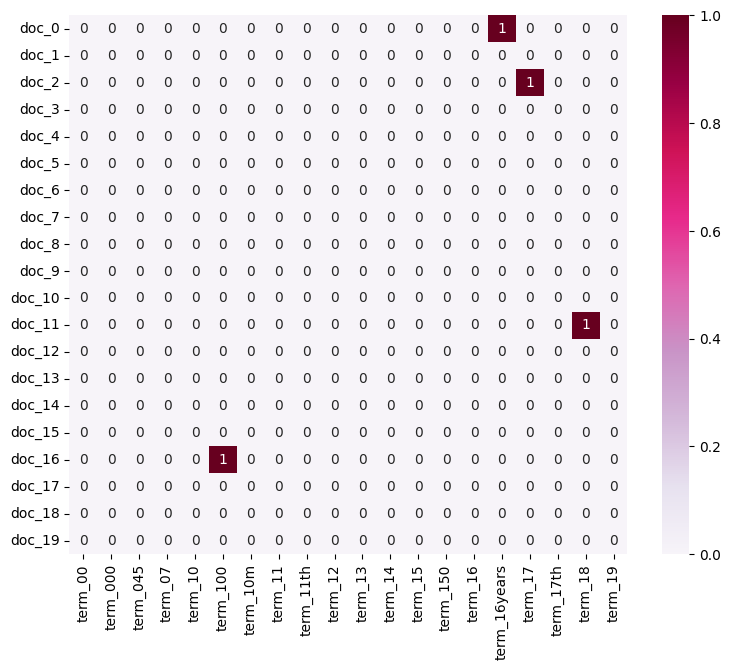

In [39]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

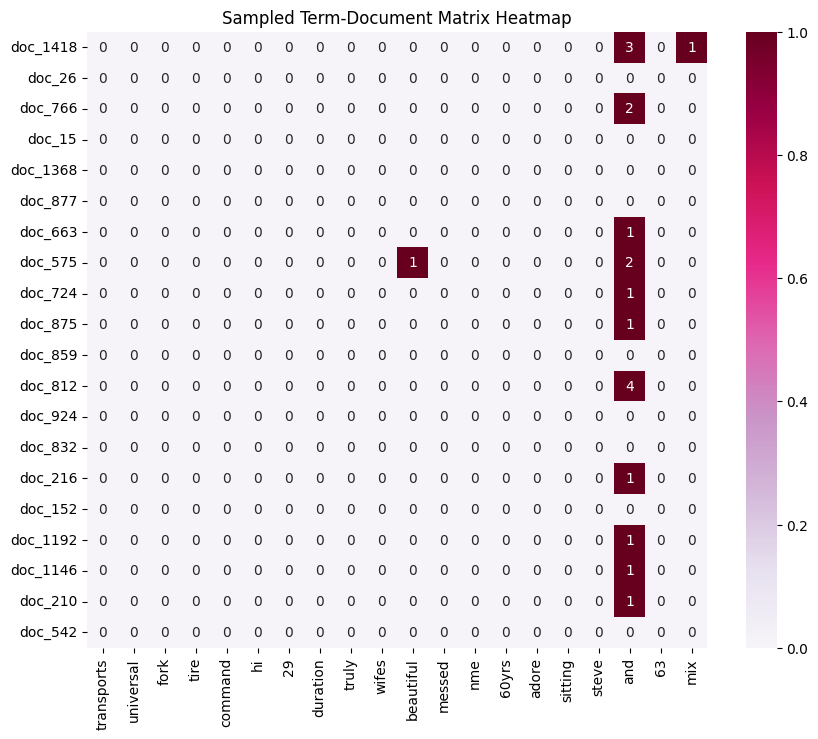

In [40]:
# sample both terms (columns) and documents (rows) randomly

import random
# Select a random sample of documents and terms to plot
num_documents = X_counts.shape[0]  # total number of documents
num_terms = X_counts.shape[1]  # total number of terms

# Modify this value to choose how many samples you want to plot
sample_size_docs = 20
sample_size_terms = 20

# Randomly sample documents and terms
sampled_docs = random.sample(range(num_documents), sample_size_docs)
sampled_terms = random.sample(range(num_terms), sample_size_terms)

# Create the sampled term-document matrix
plot_z_sample = X_counts[sampled_docs, :][:, sampled_terms].toarray()

# Create the labels for the plot
plot_x_sample = [count_vect.get_feature_names_out()[i] for i in sampled_terms]
plot_y_sample = ["doc_"+str(i) for i in sampled_docs]

# Convert to DataFrame for visualization
df_sampled = pd.DataFrame(plot_z_sample, columns=plot_x_sample, index=plot_y_sample)

# Plotting the heatmap for the sampled term-document matrix
plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_sampled, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.title("Sampled Term-Document Matrix Heatmap")
plt.show()


---

### 5.4 Attribute Transformation / Aggregation

In [41]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [42]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [43]:
term_frequencies[75] #sum of first term: 00

1

C:\Users\c2466\AppData\Local\Temp\ipykernel_13972\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


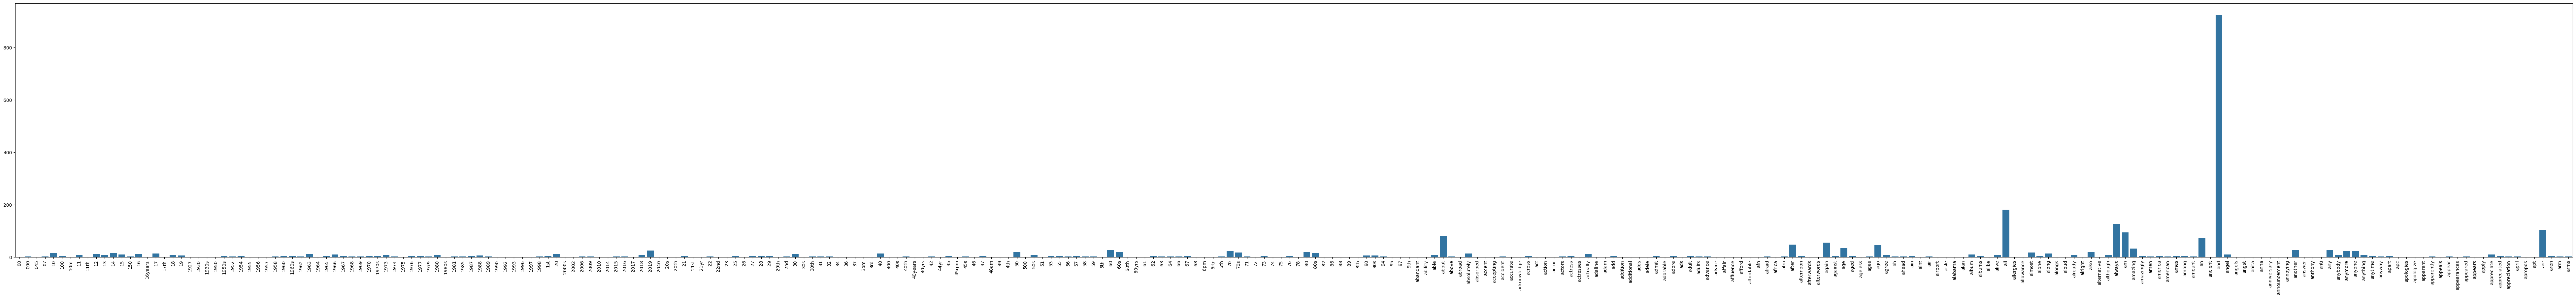

In [44]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

In [45]:
# Answer here
import plotly.graph_objects as go
import numpy as np

# Assuming term_frequencies and vocabulary (count_vect.get_feature_names_out()) are defined

# Calculate term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]  # Sum of all documents for each term

# Selecting a subset of terms (indices 0:300 in this case)
selected_terms = count_vect.get_feature_names_out()[:300]
selected_frequencies = term_frequencies[:300]

# Create a bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=selected_terms,  # Term names (words) for x-axis
    y=selected_frequencies,  # Corresponding frequencies for y-axis
))

# Update layout to improve visualization
fig.update_layout(
    title="Term Frequencies for Selected Terms (Indices 0:300)",
    xaxis_title="Terms",
    yaxis_title="Frequencies",
    xaxis_tickangle=-90,  # Rotate x-axis labels for better readability
    height=600,
    width=1200,
)

# Show interactive plot
fig.show()


---

In [46]:
# Answer here
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]  # Sum of term counts across all documents
vocab = count_vect.get_feature_names_out()  # Vocabulary array

In [47]:
# Number of terms to visualize
N = 20  # Choose a smaller number like 20 for less computational load

# Sort indices of terms by frequency (descending order for most frequent)
top_n_indices = np.argsort(term_frequencies)[-N:]

# Select corresponding terms and their frequencies
top_n_terms = vocab[top_n_indices]
top_n_frequencies = term_frequencies[top_n_indices]

In [48]:
# Sort indices of terms by frequency (ascending order for least frequent)
bottom_n_indices = np.argsort(term_frequencies)[:N]

# Select corresponding terms and their frequencies
bottom_n_terms = vocab[bottom_n_indices]
bottom_n_frequencies = term_frequencies[bottom_n_indices]

In [49]:
import plotly.graph_objects as go

# Choose the subset you want to visualize: top_n_terms or bottom_n_terms
terms_to_plot = top_n_terms  # You can swap with bottom_n_terms if needed
frequencies_to_plot = top_n_frequencies  # Corresponding frequencies

# Create a bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=terms_to_plot,  # Reduced term set (words)
    y=frequencies_to_plot,  # Corresponding term frequencies
))

# Update layout for better visualization
fig.update_layout(
    title=f"Top {N} Most Frequent Terms",
    xaxis_title="Terms",
    yaxis_title="Frequencies",
    xaxis_tickangle=-90,  # Rotate labels for better readability
    height=600,
    width=800,
)

# Show interactive plot
fig.show()


---

In [50]:
# Answer here
# Calculate term frequencies as before
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
vocab = count_vect.get_feature_names_out()  # Get vocabulary (terms)

# Sort terms by frequency in descending order
sorted_indices = np.argsort(term_frequencies)[::-1]  # Sort in descending order
sorted_frequencies = term_frequencies[sorted_indices]
sorted_terms = vocab[sorted_indices]

# Plot top-N sorted terms for visualization
N = 50  # You can adjust this number as needed to see more/less terms
terms_to_plot = sorted_terms[:N]
frequencies_to_plot = sorted_frequencies[:N]

In [51]:
# Create a bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=terms_to_plot,  # Sorted term set (words)
    y=frequencies_to_plot,  # Corresponding sorted term frequencies
))

# Update layout for better visualization
fig.update_layout(
    title=f"Top {N} Terms Sorted by Frequency (Long Tail Visualization)",
    xaxis_title="Terms (Sorted by Frequency)",
    yaxis_title="Frequencies",
    xaxis_tickangle=-90,  # Rotate labels for better readability
    height=600,
    width=800,
)

# Show interactive plot
fig.show()


---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [52]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\c2466\AppData\Local\Temp\ipykernel_13972\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



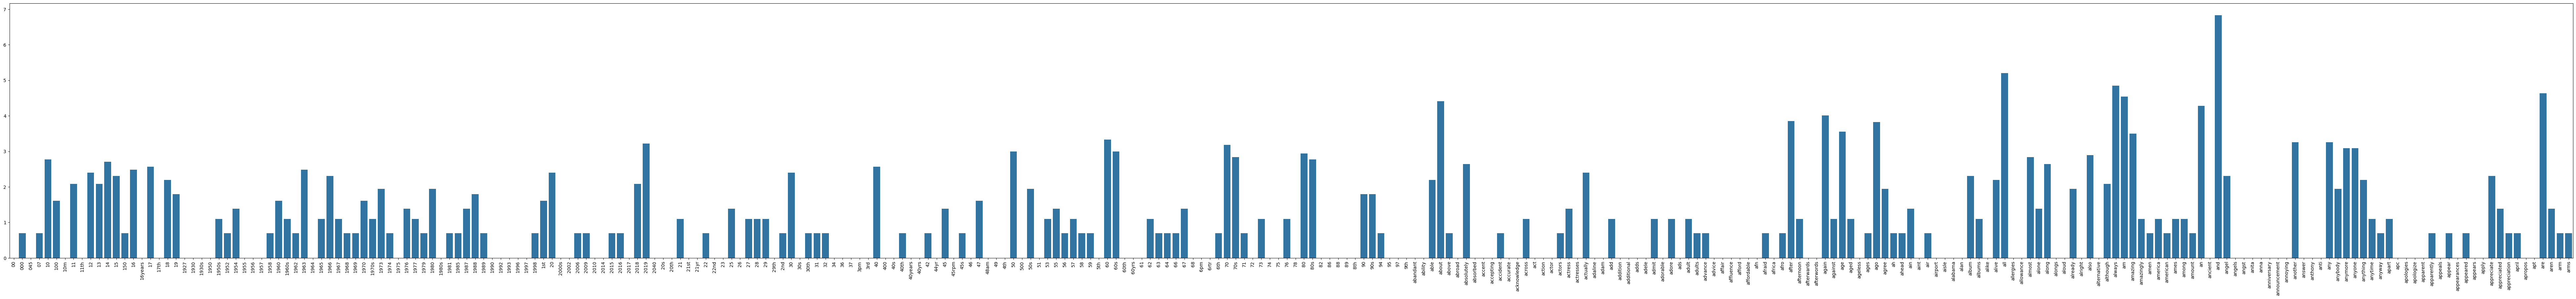

In [53]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

C:\Users\c2466\AppData\Local\Temp\ipykernel_13972\2287886675.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



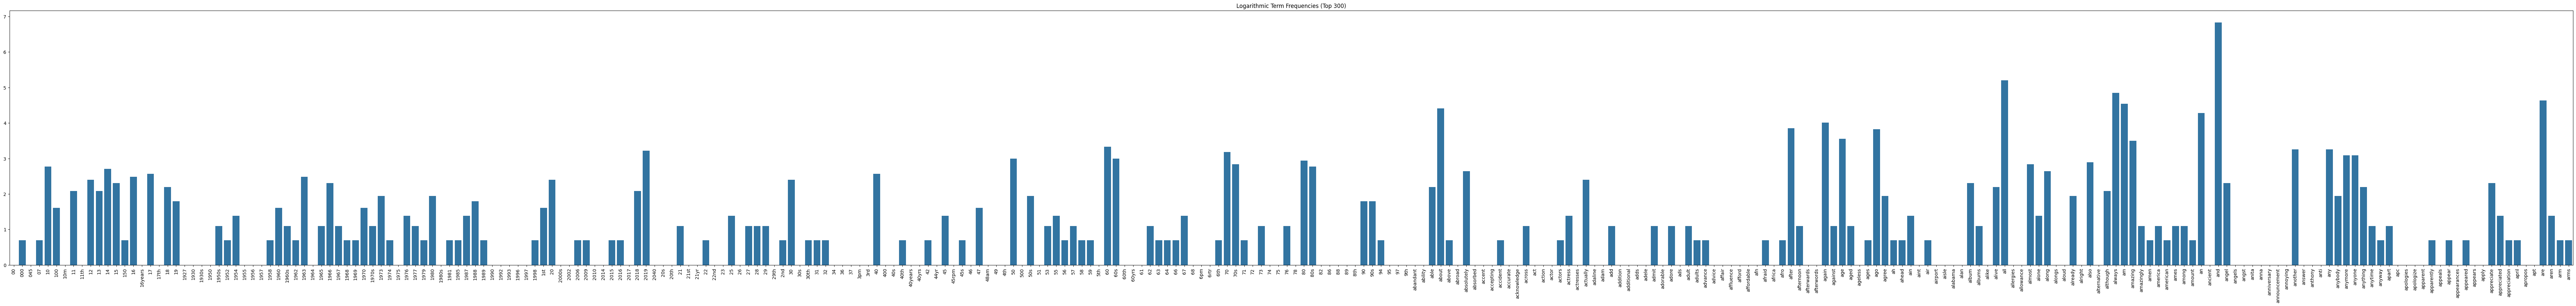

In [54]:
# Answer here
# Calculate logarithmic term frequencies
term_frequencies_log = [math.log(i) if i > 0 else 0 for i in term_frequencies]  # Avoid log(0) issues

# Plot using seaborn (log distribution)
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)
plt.title('Logarithmic Term Frequencies (Top 300)')
plt.show()


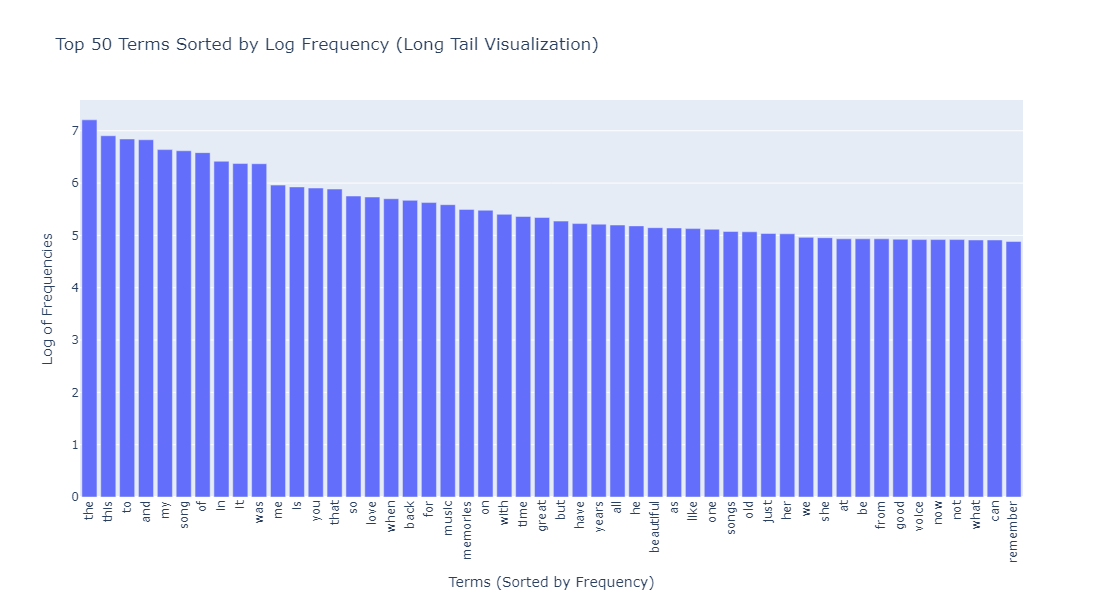

In [55]:
# Convert term frequencies to logarithmic scale
frequencies_to_plot_log = [math.log(i) if i > 0 else 0 for i in frequencies_to_plot]

# Create a bar chart using Plotly
fig = go.Figure()

# Add bar trace with log-transformed frequencies
fig.add_trace(go.Bar(
    x=terms_to_plot,  # Sorted term set (words)
    y=frequencies_to_plot_log,  # Corresponding log-transformed frequencies
))

# Update layout for better visualization
fig.update_layout(
    title=f"Top {N} Terms Sorted by Log Frequency (Long Tail Visualization)",
    xaxis_title="Terms (Sorted by Frequency)",
    yaxis_title="Log of Frequencies",
    xaxis_tickangle=-90,  # Rotate labels for better readability
    height=600,
    width=800,
)

# Show interactive plot
fig.show()

### comment:
### 在使用線性頻率圖時，頻率較高的詞彙會顯得極為突出，而頻率較低的詞彙幾乎難以辨別，長尾部分難以被觀察到。而在對頻率進行對數轉換後，這些差異被壓縮，使得較少出現的詞彙也能清楚顯示出來。這種視覺化方式讓我們能更均衡地觀察到所有頻率範圍內的詞彙，特別是中低頻詞彙，有助於發現潛在的重要詞彙和數據中的異常情況。

###  Finding frequent patterns

#### METHOD 1. 

In [56]:
## METHOD 1. 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [57]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     1         0      0        0    0    0        0      0  
748     0         0      0        0    0    0        0      0  

[749 rows x 2602 columns]

#### METHOD 2. TF-IDF 

In [59]:
## METHOD 2. TF-IDF
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Create separate DataFrames for each category
categories = df['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    tv = TfidfVectorizer()  # Initialize the TfidfVectorizer()
    X_counts = tv.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = tv.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_Tfidf_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_Tfidf_dfs[category] = create_term_document_df(category_dfs[category])

In [61]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=1 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_Tfidf_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


07   10   11  11th   12        13   14   15   16        17  ...  young  \
0    0.0  0.0  0.0   0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  ...    0.0   
1    0.0  0.0  0.0   0.0  0.0  0.000000  0.0  0.0  0.0  0.135932  ...    0.0   
2    0.0  0.0  0.0   0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  ...    0.0   
3    0.0  0.0  0.0   0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  ...    0.0   
4    0.0  0.0  0.0   0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  ...    0.0   
..   ...  ...  ...   ...  ...       ...  ...  ...  ...       ...  ...    ...   
745  0.0  0.0  0.0   0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  ...    0.0   
746  0.0  0.0  0.0   0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  ...    0.0   
747  0.0  0.0  0.0   0.0  0.0  0.225266  0.0  0.0  0.0  0.000000  ...    0.0   
748  0.0  0.0  0.0   0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  ...    0.0   
749  0.0  0.0  0.0   0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  ...    0.0   

     younger  youngster      your  yours  youth  youthful  youtube  yrs  \
0        0.0        0.0  0.000000    0.0    0.0       0.0      0.0  0.0   
1        0.0        0.0  0.000000    0.0    0.0       0.0      0.0  0.0   
2        0.0        0.0  0.000000    0.0    0.0       0.0      0.0  0.0   
3        0.0        0.0  0.196577    0.0    0.0       0.0      0.0  0.0   
4        0.0        0.0  0.000000    0.0    0.0       0.0      0.0  0.0   
..       ...        ...       ...    ...    ...       ...      ...  ...   
745      0.0        0.0  0.000000    0.0    0.0       0.0      0.0  0.0   
746      0.0        0.0  0.000000    0.0    0.0       0.0      0.0  0.0   
747      0.0        0.0  0.000000    0.0    0.0       0.0      0.0  0.0   
748      0.0        0.0  0.000000    0.0    0.0       0.0      0.0  0.0   
749      0.0        0.0  0.000000    0.0    0.0       0.0      0.0  0.0   

          yup  
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
..        ...  
745  0.355567  
746  0.000000  
747  0.000000  
748  0.000000  
749  0.000000  

[750 rows x 2295 columns]

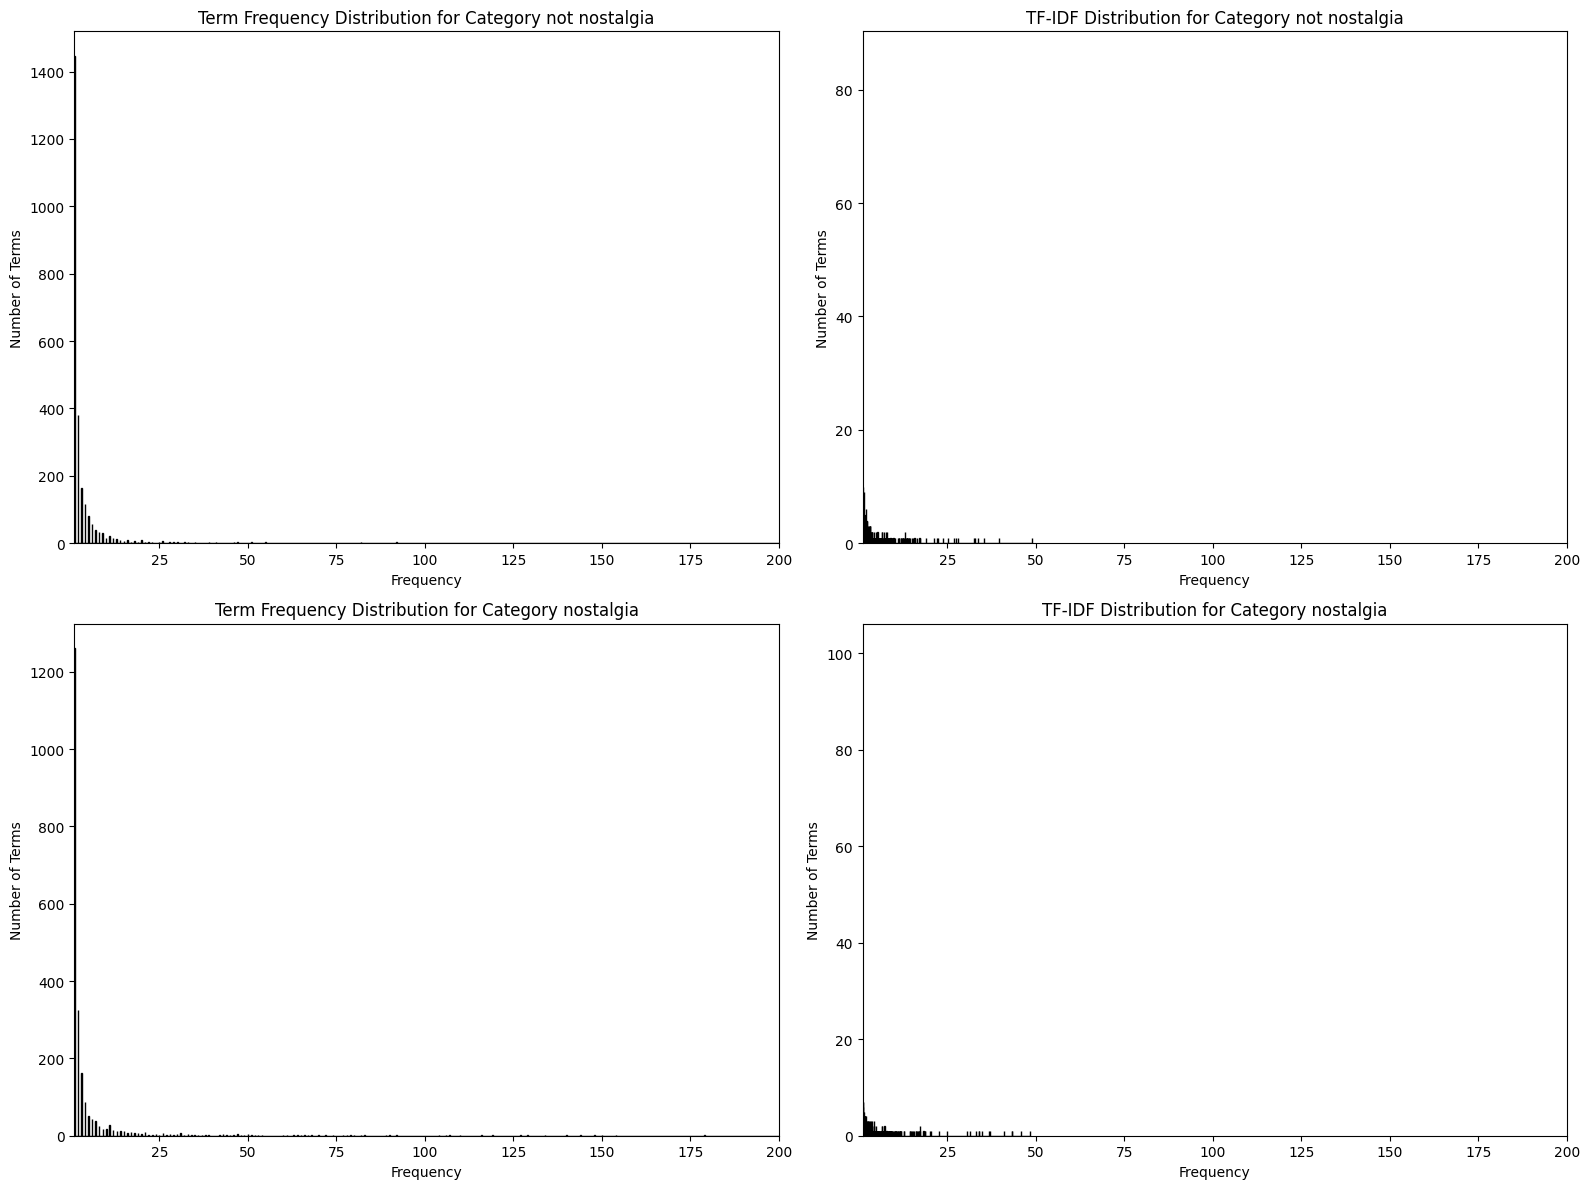

In [68]:
import matplotlib.pyplot as plt

# 設定 category_numbers 及數據
category_numbers = [0, 1]
word_counts_freq_0 = filt_term_document_dfs[categories[category_numbers[0]]].sum(axis=0).to_numpy()
word_counts_tfidf_0 = filt_term_document_Tfidf_dfs[categories[category_numbers[0]]].sum(axis=0).to_numpy()
word_counts_freq_1 = filt_term_document_dfs[categories[category_numbers[1]]].sum(axis=0).to_numpy()
word_counts_tfidf_1 = filt_term_document_Tfidf_dfs[categories[category_numbers[1]]].sum(axis=0).to_numpy()

# 建立2x2子圖
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 左上：Category 0 - Term Frequency Distribution
axs[0, 0].hist(word_counts_freq_0, bins=5000, color='blue', edgecolor='black')
axs[0, 0].set_title(f'Term Frequency Distribution for Category {categories[category_numbers[0]]}')
axs[0, 0].set_xlabel('Frequency')
axs[0, 0].set_ylabel('Number of Terms')
axs[0, 0].set_xlim(1, 200)

# 右上：Category 0 - TF-IDF Distribution
axs[0, 1].hist(word_counts_tfidf_0, bins=5000, color='red', edgecolor='black')
axs[0, 1].set_title(f'TF-IDF Distribution for Category {categories[category_numbers[0]]}')
axs[0, 1].set_xlabel('Frequency')
axs[0, 1].set_ylabel('Number of Terms')
axs[0, 1].set_xlim(1, 200)

# 左下：Category 1 - Term Frequency Distribution
axs[1, 0].hist(word_counts_freq_1, bins=5000, color='blue', edgecolor='black')
axs[1, 0].set_title(f'Term Frequency Distribution for Category {categories[category_numbers[1]]}')
axs[1, 0].set_xlabel('Frequency')
axs[1, 0].set_ylabel('Number of Terms')
axs[1, 0].set_xlim(1, 200)

# 右下：Category 1 - TF-IDF Distribution
axs[1, 1].hist(word_counts_tfidf_1, bins=5000, color='red', edgecolor='black')
axs[1, 1].set_title(f'TF-IDF Distribution for Category {categories[category_numbers[1]]}')
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('Number of Terms')
axs[1, 1].set_xlim(1, 200)

# 調整子圖間距並顯示圖表
plt.tight_layout()
plt.show()


In [84]:
category_number=1 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
Tfidf_word_counts = filt_term_document_Tfidf_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order
Tfidf_sorted_indices = np.argsort(Tfidf_word_counts)[::-1]  # Get indices of sorted frequencies
Tfidf_sorted_counts = np.sort(Tfidf_word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)
Tfidf_total_terms = len(Tfidf_sorted_counts)
Tfidf_top_5_percent_index = int(0.05 * Tfidf_total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]
Tfidf_top_5_percent_indices = Tfidf_sorted_indices[:Tfidf_top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]
Tfidf_filtered_words = [filt_term_document_Tfidf_dfs[categories[category_number]].iloc[:, i].name for i in Tfidf_top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print('* word frequency features')
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")
print("---------------------------------------------------------------")
print('* Tfidf features')
print(f"Number of terms in top 5%: {Tfidf_top_5_percent_index}")
print(f"Filtered terms: {Tfidf_filtered_words}")


Category: nostalgia
* word frequency features
Number of terms in top 5%: 114
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for', 'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great', 'brings', 'we', 'beautiful', 'as', 'all', 'but', 'now', 'days', 'at', 'miss', 'good', 'songs', 'childhood', 'reminds', 'her', 'from', 'still', 'he', 'just', 'always', 'have', 'she', 'first', 'dad', 'many', 'had', 'much', 'listening', 'his', 'like', 'loved', 'up', 'used', 'school', 'were', 'very', 'am', 'one', 'those', 'voice', 'every', 'be', 'him', 'never', 'heard', 'times', 'these', 'can', 'listen', 'not', 'young', 'what', 'are', 'best', 'they', 'played', 'hear', 'thank', 'sing', 'out', 'how', 'life', 'happy', 'thanks', 'then', 'radio', 'again', 'ago', 'really', 'mum', 'who', 'an', 'day', 'play', 'mom', 'there', 'some', 'our', 'after', 'came', 'passed', 'makes', 'wonderful', 'singing',

Here we can explore the frequencies of the **top 5%** words:

In [85]:
print('word frequency features: ',filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0)) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.
print('TF-IDF features: ',filt_term_document_Tfidf_dfs[categories[category_number]].loc[:,'the'].sum(axis=0)) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

word frequency features:  643
TF-IDF features:  48.193895372037616


In [86]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
Tfidf_word_counts = filt_term_document_Tfidf_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies
Tfidf_sorted_indices = np.argsort(Tfidf_word_counts)  # Get indices of sorted frequencies
Tfidf_sorted_counts = Tfidf_word_counts[Tfidf_sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)
Tfidf_total_terms = len(Tfidf_sorted_counts)
Tfidf_bottom_1_percent_index = int(0.01 * Tfidf_total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]
Tfidf_bottom_1_percent_indices = Tfidf_sorted_indices[:Tfidf_bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]
Tfidf_filtered_words = [filt_term_document_Tfidf_dfs[categories[category_number]].iloc[:, i].name for i in Tfidf_bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print('* word frequency features')
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")
print("---------------------------------------------------------------")
print('* Tfidf features')
print(f"Number of terms in bottom 1%: {Tfidf_bottom_1_percent_index}")
print(f"Filtered terms: {Tfidf_filtered_words}")


Category: not nostalgia
* word frequency features
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']
---------------------------------------------------------------
* Tfidf features
Number of terms in bottom 1%: 26
Filtered terms: ['excited', 'wondering', 'whispering', 'familiar', 'vice', 'versa', 'following', 'ears', 'minds', 'miles', '67', 'basic', 'conclusion', 'points', 'profane', 'non', 'illicit', 'realise', 'bold', 'existent', 'historic', 'alternative', 'explicit', 'fossils', '40s', 'kissing']


Here we can explore the frequencies of the **bottom 1%** words:

In [87]:
print('word frequency features: ',filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0))
print('Tfidf features: ',filt_term_document_Tfidf_dfs[categories[category_number]].loc[:,'the'].sum(axis=0))

word frequency features:  708
Tfidf features:  48.81383531976792


Well done, now that we have seen what type of words are inside the thresholds we set, then we can procede to **filter them out of the dataframe**. If you want to experiment after you complete the lab, you can return to try different percentages to filter, or not filter at all to do all the subsequent tasks for the pattern minings, and see if there is a significant change in the result.

In [66]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
744    0    0   0    0    0   0   0   0   0    0  ...        0         0   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   
748    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
744           0         0      0        0    0    0        0      0  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  

[749 rows x 2446 columns]

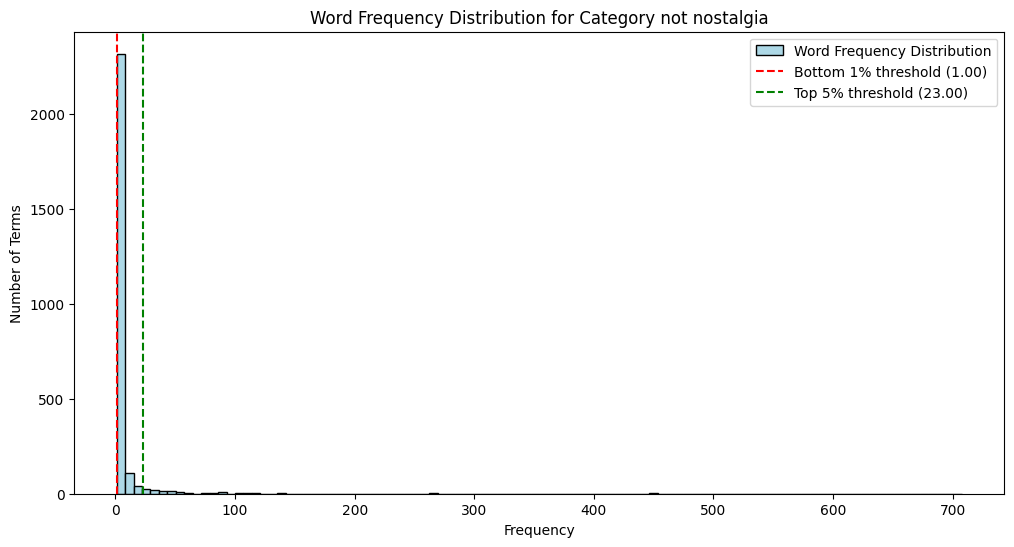

In [88]:
import matplotlib.pyplot as plt

# 計算每個詞的總和
category_number = 0  # 你可以更改這個數值來選擇不同的類別
word_sums = filt_term_document_dfs[categories[category_number]].sum(axis=0)
sorted_words = word_sums.sort_values()

# 計算要篩選的詞彙數量
total_words = len(sorted_words)
top_n = int(0.05 * total_words)
bottom_n = int(0.01 * total_words)

# 獲取被篩選的詞彙
bottom_words = sorted_words.head(bottom_n)
top_words = sorted_words.tail(top_n)

# 繪製分佈圖
plt.figure(figsize=(12, 6))
plt.hist(word_sums, bins=100, color='lightblue', edgecolor='black', label='Word Frequency Distribution')
plt.axvline(bottom_words.max(), color='red', linestyle='--', linewidth=1.5, label=f'Bottom 1% threshold ({bottom_words.max():.2f})')
plt.axvline(top_words.min(), color='green', linestyle='--', linewidth=1.5, label=f'Top 5% threshold ({top_words.min():.2f})')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.title(f'Word Frequency Distribution for Category {categories[category_number]}')
plt.legend()
plt.show()


In [89]:
from wordcloud import WordCloud

# 將頻率轉換為字典格式以便生成詞雲
word_freq_dict = word_sums.to_dict()

# 創建詞雲
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
wordcloud.generate_from_frequencies(word_freq_dict)

# 顯示詞雲
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Category {categories[category_number]}')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [67]:
from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
#from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code gives you trouble
    #obj = DF2DB(term_document_dfs[category])           

    output_file_path = f'td_freq_db_{category_safe}.csv'  # Output file path
    obj.convert2TransactionalDatabase(output_file_path, '>=', 1)  # Pass the path as a string

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


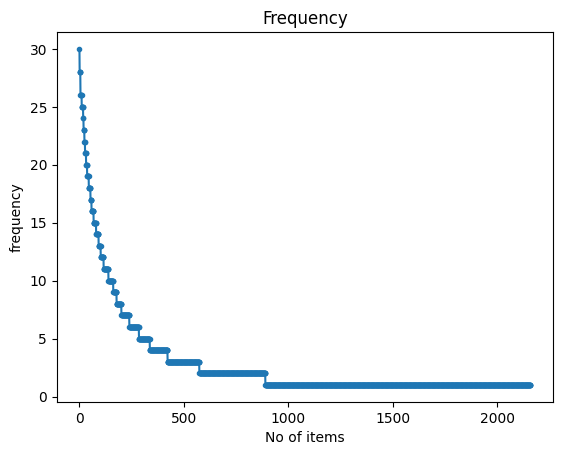

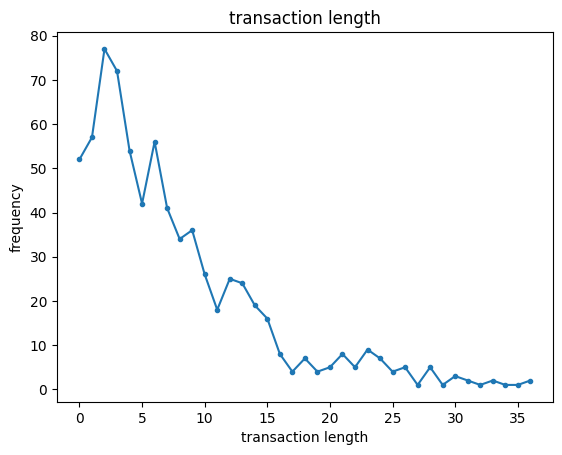

In [68]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


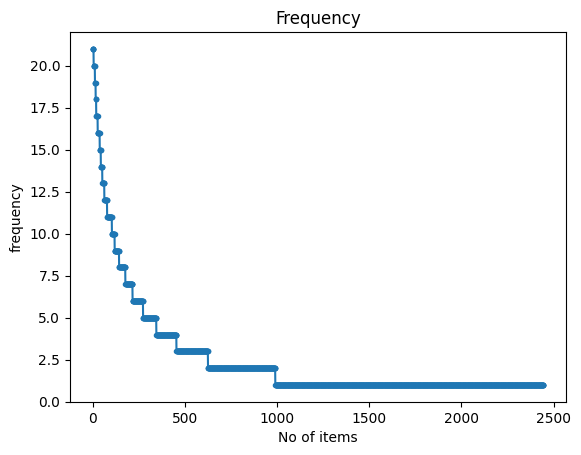

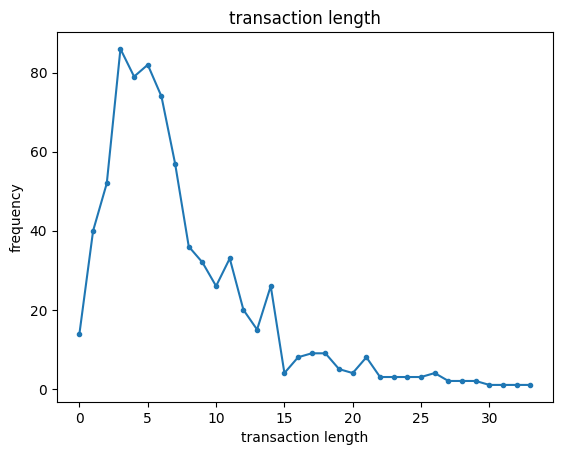

In [69]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [70]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.014488935470581055


In [71]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

In [72]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.007205486297607422


In [73]:
obj1.save('freq_patterns_not nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      every       21
140      loved       21
141    classic       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

In [74]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df_pattern in dfs:
    for pattern in df_pattern['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df_pattern) for df_pattern in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df_pattern in dfs:
    filtered_df = df_pattern[df_pattern['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [75]:
print(df.info)

<bound method DataFrame.info of           sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      category                                           unigrams  
0          

In [76]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(df['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
0      0    0    0   0   0    0    0   0     0   0  ...       0       0   
1      0    0    0   0   0    0    0   0     0   0  ...       0       0   
2      0    0    0   0   0    0    0   0     0   0  ...       0       0   
3      0    0    0   0   0    0    0   0     0   0  ...       0       0   
4      0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
0          0       0     0         0        0   0      0    0  
1          0       0     0         0        0   0      0    0  
2          0       0     0         0        0   0      0    0  
3          0       0     0         0        0   0      0    0  
4          0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1495       0       0     0         0        0   0      0    0  
1496       0       0     0         0        0   0      0    0  
1497       0       0     0         0        0   0      0    0  
1498       0       0     0         0        0   0      0    0  
1499       0       0     0         0        0   0      0    0  

[1499 rows x 3950 columns]

###  Implement the FAE Top-K and MaxFPGrowth algorithms

In [77]:
import PAMI
dir(PAMI)

['__author__',
 '__builtins__',
 '__cached__',
 '__credits__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'extras',
 'frequentPattern']

In [78]:
# Answer Here
import pandas as pd
import time
from PAMI.frequentPattern.topk import FAE as alg
#from PAMI.frequentPattern.basic import FPGrowth as alg

# Load your processed 'comp.graphics' transactional database
input_file = 'td_freq_db_not nostalgia.csv'

In [79]:
# Function to run FAE Top-K algorithm and record runtime
def run_fae_top_k(k_value):
    # Initialize the FAE_TopK algorithm with k value
    fae_top_k = alg.FAE(iFile=input_file, k=k_value)
    
    # Start time
    start_time = time.time()
    
    # Mine patterns
    fae_top_k.mine()
    
    # Get mined patterns as DataFrame
    patterns_df = fae_top_k.getPatternsAsDataFrame()
    
    # End time and runtime
    runtime = time.time() - start_time
    
    # Print runtime and total patterns
    print(f"FAE Top-K (k={k_value}) Runtime: {runtime:.4f} seconds")
    print(f"Total patterns found: {len(patterns_df)}")
    
    return patterns_df, runtime

# Run trials with k values of 500, 700, and 1000
k_values = [500, 700, 1000]
fae_top_k_results = {}

for k in k_values:
    patterns, runtime = run_fae_top_k(k)
    fae_top_k_results[k] = {'patterns': patterns, 'runtime': runtime}


 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K (k=500) Runtime: 0.0856 seconds
Total patterns found: 500
 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K (k=700) Runtime: 0.1887 seconds
Total patterns found: 700
 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K (k=1000) Runtime: 9.6935 seconds
Total patterns found: 1000


In [80]:
# Function to run MaxFPGrowth algorithm and record runtime
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

def run_max_fpgrowth(min_sup):
    # Initialize the MaxFPGrowth algorithm with a minimum support threshold
    max_fpgrowth = alg.MaxFPGrowth(iFile=input_file, minSup=min_sup)
    
    # Start time
    start_time = time.time()
    
    # Mine patterns
    max_fpgrowth.mine()
    
    # Get mined patterns as DataFrame
    patterns_df = max_fpgrowth.getPatternsAsDataFrame()
    
    # End time and runtime
    runtime = time.time() - start_time
    
    # Print runtime and total patterns
    print(f"MaxFPGrowth (minSup={min_sup}) Runtime: {runtime:.4f} seconds")
    print(f"Total patterns found: {len(patterns_df)}")
    
    return patterns_df, runtime

# Run trials with minimum support values of 3, 6, and 9
min_sup_values = [3, 6, 9]
max_fpgrowth_results = {}

for min_sup in min_sup_values:
    patterns, runtime = run_max_fpgrowth(min_sup)
    max_fpgrowth_results[min_sup] = {'patterns': patterns, 'runtime': runtime}


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth (minSup=3) Runtime: 0.0471 seconds
Total patterns found: 592
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth (minSup=6) Runtime: 0.0344 seconds
Total patterns found: 271
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth (minSup=9) Runtime: 0.0286 seconds
Total patterns found: 144


---

### 5.5 Dimensionality Reduction

In [82]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [83]:
X_pca_tdm.shape

(1499, 2)

In [84]:
X_tsne_tdm.shape

(1499, 2)

In [85]:
X_umap_tdm.shape

(1499, 2)

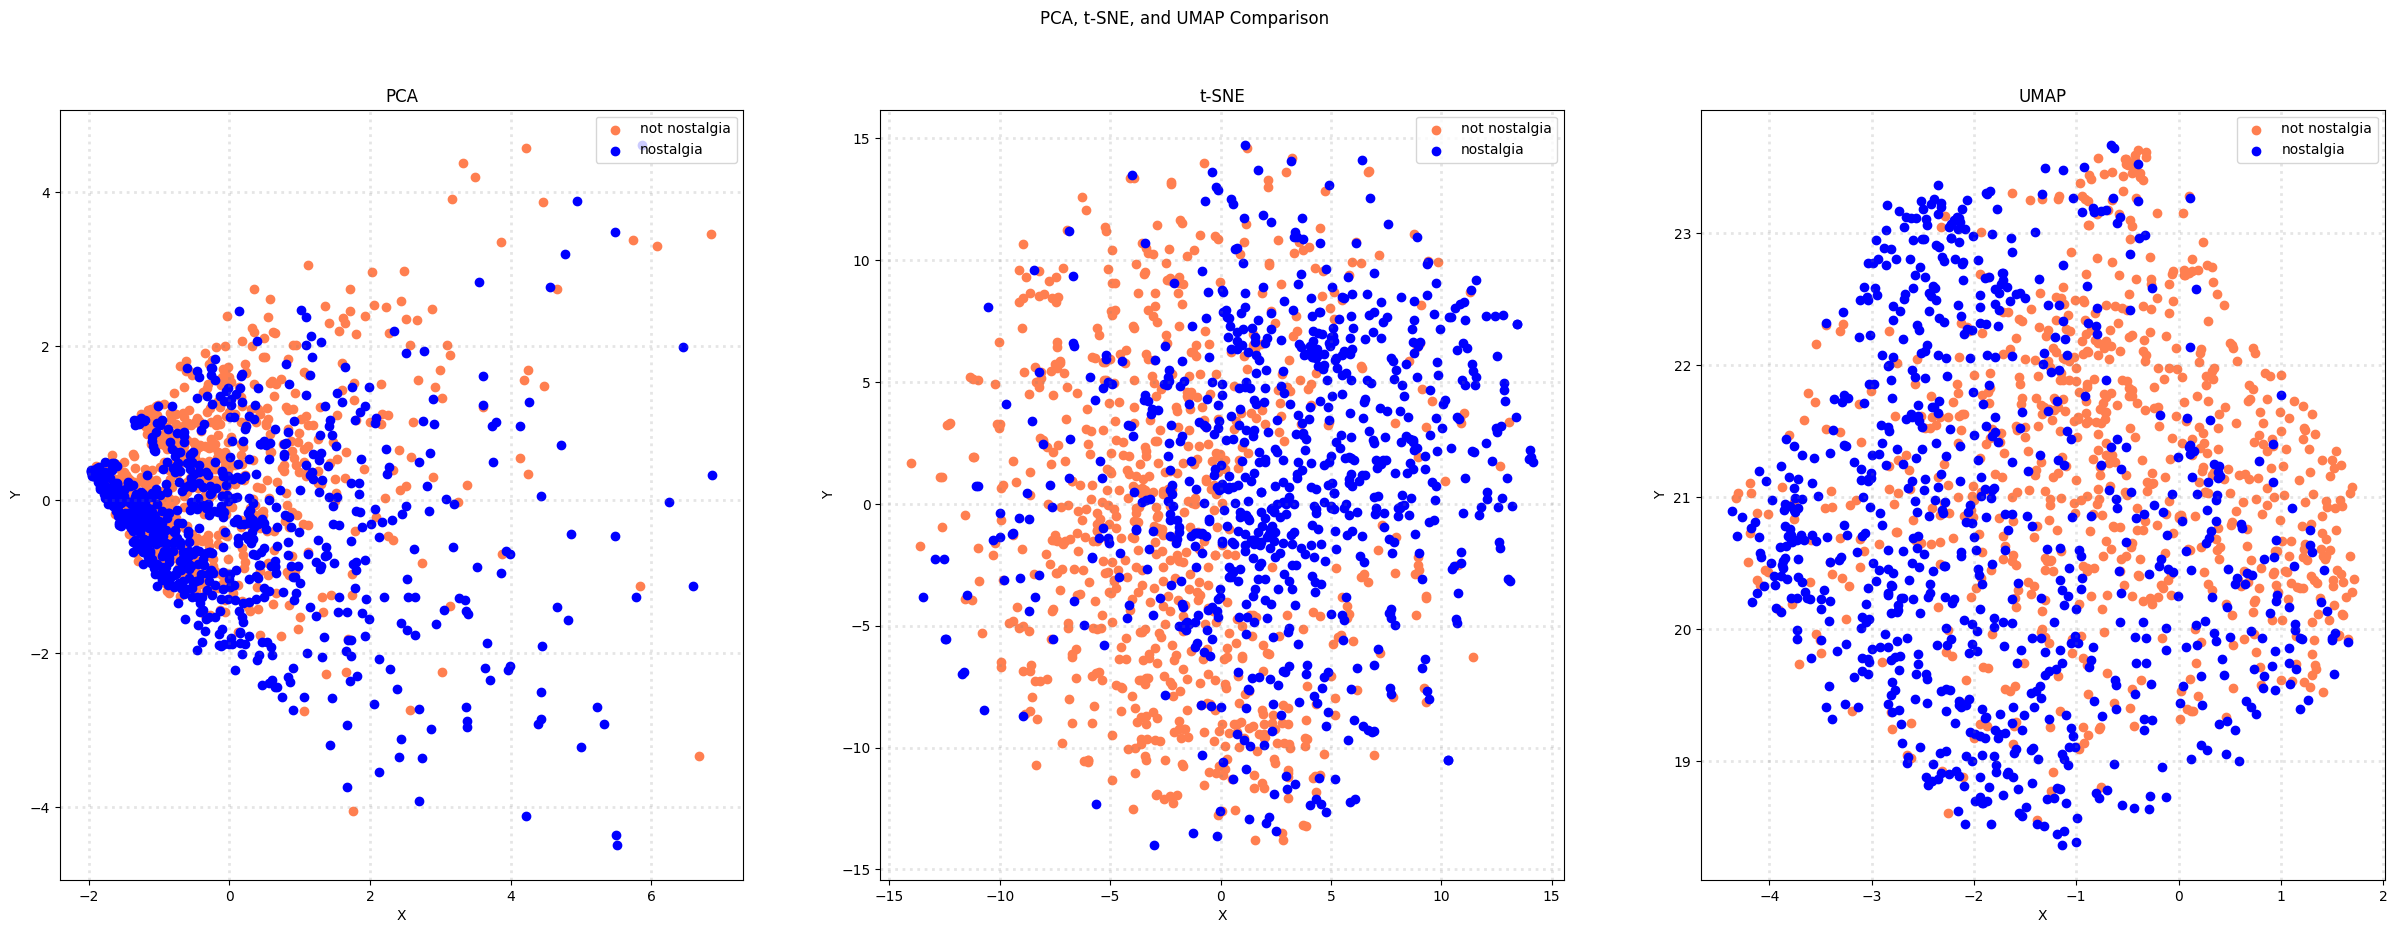

In [87]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

From the 2D PCA visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special grouping by category, but it is not immediately clear. In the t-SNE graph we observe a more scattered distribution, but still intermixing with all the categories. And with the UMAP graph, the limits for the data seem pretty well defined, two categories seem to have some points well differentiated from the other classes, but most of them remain intermixed. The algorithms were applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

Now let's try in tandem with our pattern augmented data:

In [88]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

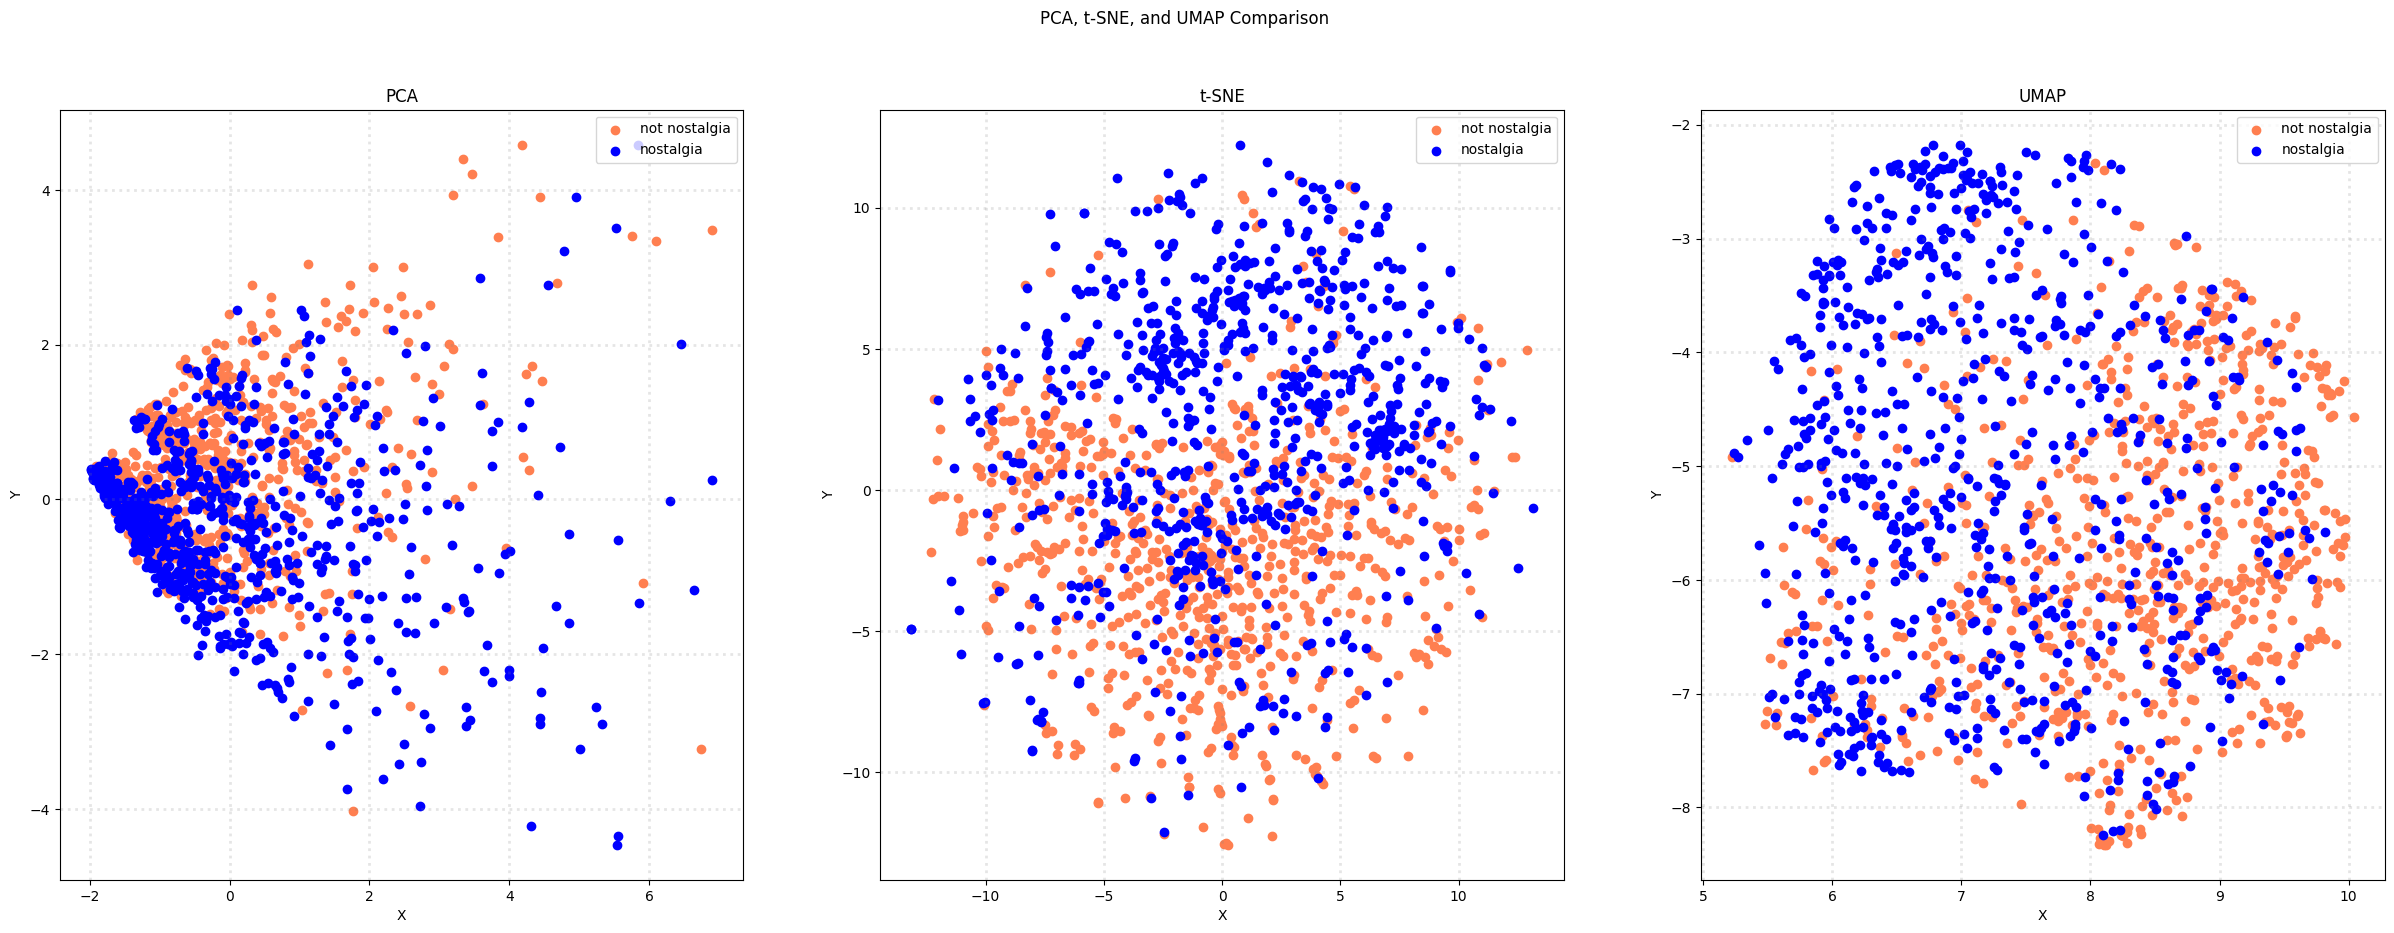

In [90]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [91]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D


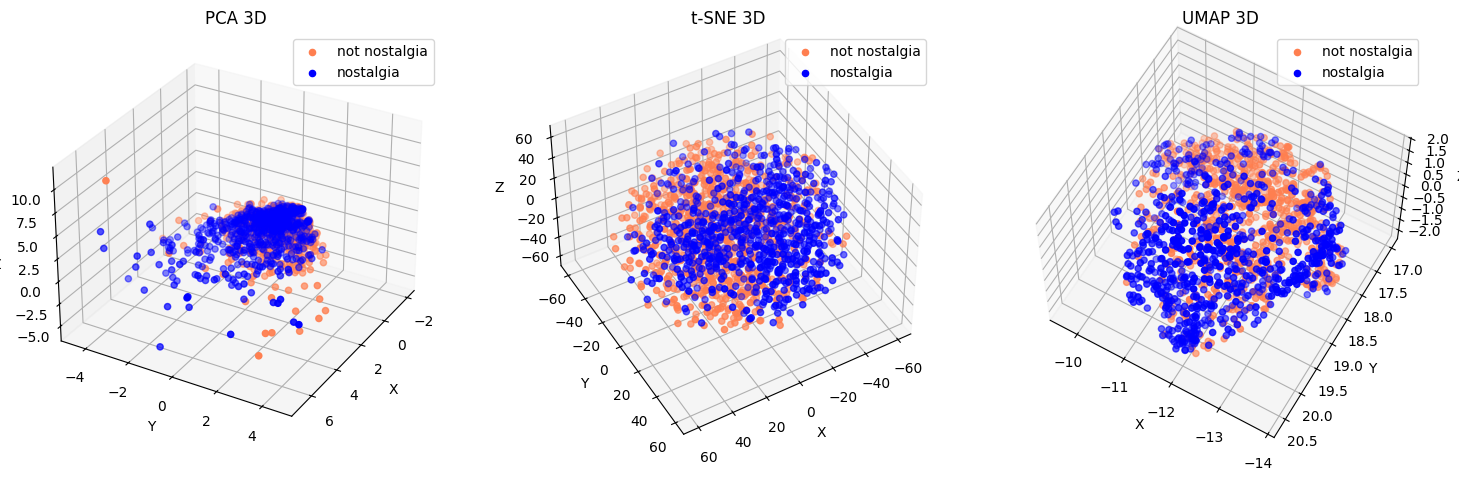

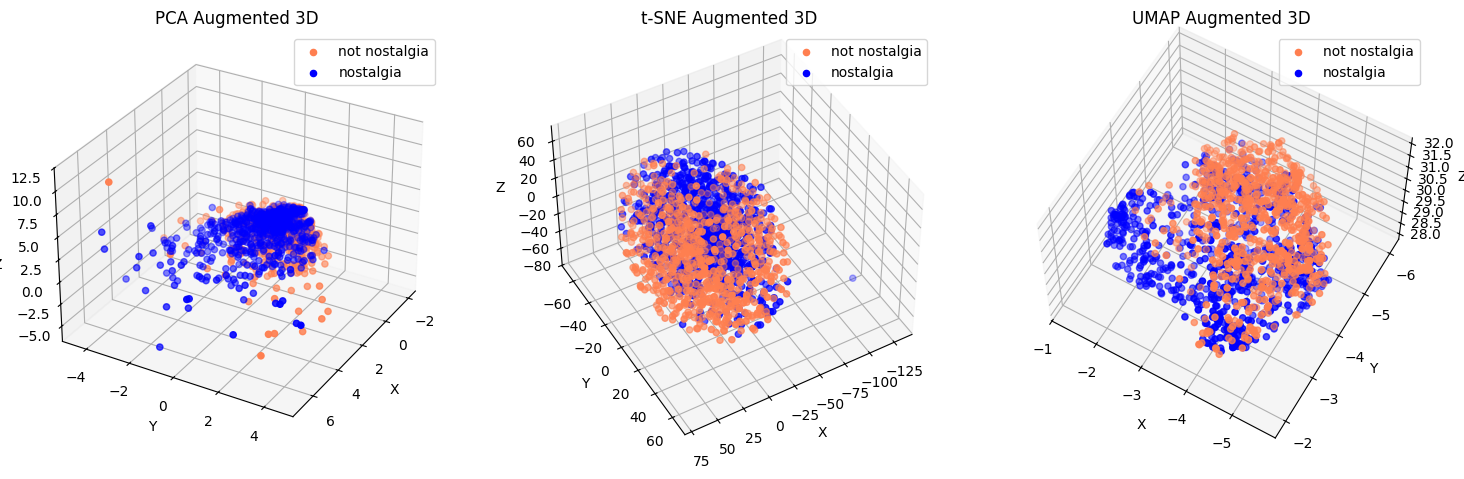

In [94]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA, t-SNE, and UMAP to reduce to 3 dimensions
X_pca_tdm_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = df['sentiment'].unique()

# Define a function to plot 3D scatter with customizable angles
def plot_3d_scatter(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        zs = X_reduced[df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)
    ax.legend(loc='upper right')

# Create subplots for 3D PCA, t-SNE, and UMAP
fig = plt.figure(figsize=(18, 6))

# To explore different perspectives of the data (elevation and azimuth)
angles = [(30, 30), (45, 60), (60, 120)]

# PCA 3D Plot
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_tdm_3d, 'PCA 3D', angles[0][0], angles[0][1])

# t-SNE 3D Plot
ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_tdm_3d, 't-SNE 3D', angles[1][0], angles[1][1])

# UMAP 3D Plot
ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_tdm_3d, 'UMAP 3D', angles[2][0], angles[2][1])

plt.show()

# This might take a couple of minutes to execute
# Repeat the same process for the augmented data

# Apply PCA, t-SNE, and UMAP to the augmented data with 3 dimensions
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Create subplots for the 3D scatter plot for the augmented data
fig = plt.figure(figsize=(18, 6))

# PCA 3D Plot for augmented data
ax4 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax4, X_pca_aug_3d, 'PCA Augmented 3D', angles[0][0], angles[0][1])

# t-SNE 3D Plot for augmented data
ax5 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax5, X_tsne_aug_3d, 't-SNE Augmented 3D', angles[1][0], angles[1][1])

# UMAP 3D Plot for augmented data
ax6 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax6, X_umap_aug_3d, 'UMAP Augmented 3D', angles[2][0], angles[2][1])

plt.show()


---

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [95]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [96]:
mlb = preprocessing.LabelBinarizer()

In [99]:
print(df.info)

<bound method DataFrame.info of           sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      category                                           unigrams  \
0         

In [100]:
mlb.fit(df.category)

LabelBinarizer()

In [101]:
df['bin_category'] = mlb.transform(df['category']).tolist()

In [102]:
df[0:9]

sentiment                                            comment  category  \
0  not nostalgia  He was a singer with a golden voice that I lov...         1   
1      nostalgia  The mist beautiful voice ever I listened to hi...         0   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         0   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         1   
4      nostalgia  listening to his songs reminds me of my mum wh...         0   
5      nostalgia  Every time I heard this song as a child, I use...         0   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...         0   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...         0   
8  not nostalgia           Wherever you  are you always in my heart         1   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_category  
0  {relaxed,, now,, in, You, singer, loving., Jim...          [1]  
1  {The, Never, voice, love, still, listened, sin...          [0]  
2  {around., think, like, early., find, Mr., it, ...          [0]  
3  {be, in, leave, day, later, Now,, came, Viet, ...          [1]  
4  {mum, everyday, played, his, songs, my, who, r...          [0]  
5  {RIP, child,, your, it, Now, touches, Jim, tha...          [0]  
6  {do, then,, it, in, Jim, but, for, I, things.,...          [0]  
7  {now, ALSO, HAVE, in, Jim, with, nostalgic, lo...          [0]  
8        {Wherever, always, in, my, are, heart, you}          [1]

Take a look at the new attribute we have added to the `X` table. You can see that the new attribute, which is called `bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization** (please refer to the text book for more inforamation).

---

# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [104]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

Let's look at our emails.

In [105]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [106]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [107]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\c2466\AppData\Local\Temp\ipykernel_17748\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\c2466\AppData\Local\Temp\ipykernel_17748\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\c2466\AppData\Local\Temp\ipykernel_17748\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\c2466\AppData\Local\Temp\ipykernel_17748\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a 

As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0. 

We can assume that we have the more common features in the documents 1 and 3 than in documents 1 and 2. This reflects indeed in a higher similarity than that of sentences 1 and 3. 


# 7. Data Classification
Data classification is one of the most critical steps in the final stages of the data mining process. After uncovering patterns, trends, or insights from raw data, classification helps organize and label the data into predefined categories. This step is crucial in making the mined data actionable, as it allows for accurate predictions and decision-making. For example, in text mining, classification can be used to categorize documents based on their content, like classifying news articles into categories such as sports, politics, or technology.
Among various classification techniques, the **Naive Bayes classifier** is a simple yet powerful algorithm commonly used for text classification tasks. Specifically, the Multinomial Naive Bayes classifier is particularly suited for datasets where features are represented by term frequencies, such as a document-term matrix, like the one we have.

- **Multinomial Naive Bayes:**
    The Multinomial Naive Bayes classifier works by assuming that the features (words or terms in text data) follow a multinomial distribution. In simple terms, it calculates the probability of a document belonging to a particular category based on the frequency of words in that document, assuming independence between words (the "naive" part of Naive Bayes). Despite this assumption, it often performs remarkably well for text data, especially when working with word count features. Now, when incorporating the binary matrix of patterns we have, it remains compatible because the binary values can be seen as a count of pattern occurrences (1 for present, 0 for absent). Although binary features are not true "counts," the Multinomial Naive Bayes classifier can still handle them without issue. For more information you can go to: [NB Classifier](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/)
    
We will implement a Multinomial Naive Bayes, for that we first choose how to split our data, in this case we will follow a typical **70/30 split for the training and test set**. Let's see a comparison of what we obtain when classifying our data without patterns vs our data with the patterns.

In [109]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['category'], test_size=0.3, random_state=42)

In [110]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
486    0    0    0   0   0    0    0   0     0   0  ...      0         0   
528    0    0    0   0   0    0    0   0     0   0  ...      0         0   
200    0    0    0   0   0    0    0   0     0   0  ...      0         0   
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
845    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1131   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1295   0    0    0   0   0    0    0   0     0   0  ...      0         0   
861    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1460   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1127   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
486       0         0        0    0    0    0        0      0  
528       0         0        0    0    0    0        0      0  
200       0         0        0    0    0    0        0      0  
890       0         0        0    0    0    0        0      0  
845       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1131      0         0        0    0    0    0        0      0  
1295      0         0        0    0    0    0        0      0  
861       0         0        0    0    0    0        0      0  
1460      0         0        0    0    0    0        0      0  
1127      0         0        0    0    0    0        0      0  

[1049 rows x 3730 columns]

In [111]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1117   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1396   0    0    0   0   0    0    0   0     0   0  ...      0         0   
423    0    0    0   0   0    0    0   0     0   0  ...      0         0   
414    0    0    0   0   0    0    0   0     0   0  ...      0         0   
452    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1084   0    0    0   0   0    0    0   0     0   0  ...      0         0   
991    0    0    0   0   0    0    0   0     0   0  ...      0         0   
651    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1188   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1459   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1117      0         0        0    0    0    0        0      0  
1396      0         0        0    0    0    0        0      0  
423       0         0        0    0    0    0        0      0  
414       0         0        0    0    0    0        0      0  
452       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1084      0         0        0    0    0    0        0      0  
991       0         0        0    0    0    0        0      0  
651       0         0        2    0    0    0        0      0  
1188      0         0        0    0    0    0        0      0  
1459      0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [112]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [114]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['category'], test_size=0.3, random_state=42)

In [115]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
486    0    0    0   0   0    0    0   0     0   0  ...       0       0   
528    0    0    0   0   0    0    0   0     0   0  ...       0       0   
200    0    0    0   0   0    0    0   0     0   0  ...       0       0   
890    0    0    0   0   0    0    0   0     0   0  ...       0       0   
845    0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1131   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1295   0    0    0   0   0    0    0   0     0   0  ...       0       0   
861    0    0    0   0   0    0    0   0     0   0  ...       0       0   
1460   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1127   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
486        0       0     0         0        0   0      0    0  
528        0       0     0         0        0   0      0    0  
200        0       0     0         0        0   0      0    0  
890        0       0     0         0        0   0      0    0  
845        0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1131       0       0     0         0        0   0      1    0  
1295       0       0     0         0        0   0      0    1  
861        0       0     0         0        0   0      0    0  
1460       0       0     0         0        0   0      0    0  
1127       0       0     0         0        0   0      0    0  

[1049 rows x 3950 columns]

In [116]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
1117   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1396   0    0    0   0   0    0    0   0     0   0  ...       0       0   
423    0    0    0   0   0    0    0   0     0   0  ...       0       0   
414    0    0    0   0   0    0    0   0     0   0  ...       0       0   
452    0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1084   0    0    0   0   0    0    0   0     0   0  ...       0       0   
991    0    0    0   0   0    0    0   0     0   0  ...       0       0   
651    0    0    0   0   0    0    0   0     0   0  ...       0       0   
1188   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1459   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
1117       0       0     0         0        0   0      0    0  
1396       0       0     0         0        0   0      0    0  
423        0       0     0         0        0   0      0    0  
414        0       0     0         0        0   0      0    0  
452        0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1084       0       0     0         0        0   0      0    0  
991        0       0     0         0        0   0      0    0  
651        0       0     0         0        0   0      1    0  
1188       0       1     0         0        0   0      0    0  
1459       0       0     0         0        0   0      0    0  

[450 rows x 3950 columns]

In [117]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8644444444444445

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8185    0.9485    0.8787       233
not nostalgia     0.9333    0.7742    0.8463       217

     accuracy                         0.8644       450
    macro avg     0.8759    0.8613    0.8625       450
 weighted avg     0.8739    0.8644    0.8631       450



As you might have seen from the first model, the document-term matrix data already allows the model to classify it with great accuracy, but if we add the additional information provided by the patterns then we see a slightly better result to an already high score. While the document-term matrix captures individual word frequencies, the pattern matrix adds valuable information about co-occurrences and higher-level word combinations, providing complementary insights. This enhanced feature set allows the classifier to better differentiate between categories, particularly in cases where word frequencies alone might not be enough. 

So, now you know the importance of feature creation and pattern mining, it can give you an edge at the time of data classification.